Data loaded successfully!
Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Confusion Matrix:
[[11086   880]
 [  856   742]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564



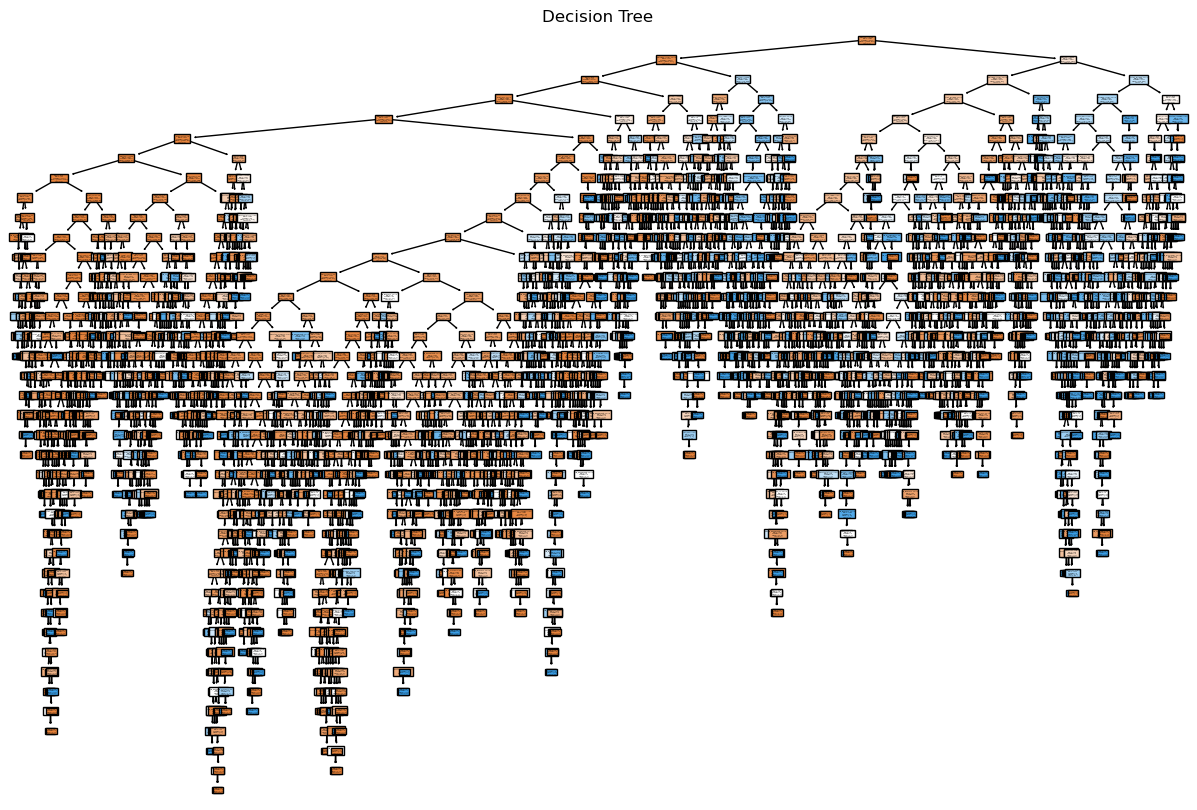

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# File path
file_path = r'C:\projects\Data Science Internship\Task-03_Decision_Tree\data\bank-full.csv'

# Load the dataset
try:
    data = pd.read_csv(file_path, sep=';')
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()

# Data Cleaning
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Encoding categorical variables
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Target variable
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into features and target
X = data.drop('y', axis=1)
y = data['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree")
plt.show()
